# Общая информация об исследовании

Исследоване уровня заработной платы профессий в сфере работы с большими данными 

Задача: оценить разброс заработных плат, в зависимости от различных факторов, таких как локация, размер компании, уровень опыта. 
        В дальнейшем на основании анализа выбрать наиболее привлекательное направление, локацию. 

Рашение: выбрать страну с наиболее привлекательными условиями для распространненного направления работы

Вопросы: 
1. Оценить уровень заработной платы в зависисмоти от года сбора данных
2. Зависимость уровня заработной оплаты от типа занятости
3. Зависимость уровня зарабтной платы от опыта респонднетов
4. Зависимость заработной платы от области работы респондента
5. Расчиать среднюю заработную плату в каждой из областей, выявить область с наиболее привлекательными условиями оплаты
6. Расчиать долю самых популярных профессий
7. Проанализировать манимальную и максимальную оплату труда 4 самых популярных профессий дата-сэта
8. Проанализировать среднюю заработную плату профессии Data Scientist в зависимости от страны резиденства работника
9. Определить в какой стране больше всего резидентов профессии Data Scientist
10. Расчитать уровень средней зарабной платы в зависимости от размера компании
11. Оценить уровень заработной платы в зависимости от размера и локации компании
   

### Вводная инфорация и расшифровка столбцов


* work_year: год получения инфорация 
* experience_level: уровень опыта респондентов:
    - entry-level - начальный уровень, junior
    - mid-level - средний уровень, midl
    - senior-level - высокий уровень, senior
* employment_type: тип занятости:
    - full-time - полный занятость
    - part-time - частичная занятость
    - contract - занятоть до окончания проекта
* job_title: специализация
* salary: заработая плата в валюте страны локации
* salary_currency: валюта страны локации
* salary_in_usd: заработная плата в долларах США
* employee_residence: место-нахождения респондента (локация)
* remote_ratio: доля удаленной работы в рабочем времени 
* company_location: место-положение компании
* company_size: размер компании, в зависимсоти от количества сотрудников или ежегодной выручки
    - L - large, крупная
   - M - medium, средняя
   - S - small, маленькая

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statistics


import matplotlib.pyplot as plt

## Получение данных

In [2]:
data = pd.read_csv('DataScience_salaries_2024.csv')
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


### Оцениваем чистоту данных

Как видно числовые данные не содержат в себе Nan элементов. При этом предствленные значения значительно отличаются. Поскольку мы анализируем данные в разрезе позиций, стран и опыта, которые оказвают значительное влияение на представленные ниже столбцы, то предлагаю не считать данные выбросами. 
На столбец salary обращать внимания нет смысла, поскоьку он расчитывается в валюте страны локации. 
По столбцу salary_in_usd видим, что средняя заработная плата в долларах составляет 149 874 долларов в год. При этом у половины респондентов заработная плата не превышает 141 300 долларов в год. 25 % респондентов имеют заработую плату до 102 000 долларов в год. 75 % респондентов имеют заработную плату превышающую 185 900 долларов в год. 



In [3]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


# Исследование

#### 1. Оценить уровень средней заработной платы в зависисмоти от года, сбора данных

In [4]:
mean_salaries = []
years = sorted(data['work_year'].unique())

for year in years:
    mean_salary = round(data[data['work_year'] == year]['salary_in_usd'].mean(), 2)
    mean_salaries.append(mean_salary)


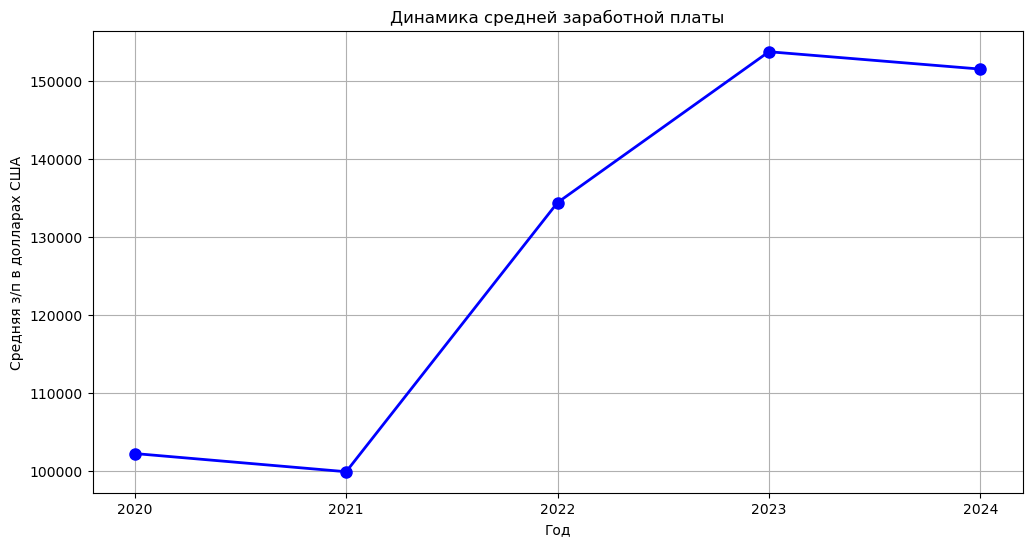

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(years, mean_salaries, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Год')
plt.xticks(years)
plt.ylabel('Средняя з/п в долларах США')
plt.title('Динамика средней заработной платы')
plt.grid(True)
plt.show()

Как видно, средняя заработная плата увеличивается от года к году. При этом к концу 2020 и концу 2023 года наблюдается некоторое снижение
при сохраняющейся восходящей тенденции. Посольку наш дата - сэт базируется на данных различных стран, в некоторых из них может наблюдаться значительная инфляция и девальвация, то можно заключить, что в среденем, направления анализа данных имеют тенденцию к увеличению средней заработной платы.

#### 2. Зависимоть уровня заработной оплаты от типа занятости

Многие компании предлагают возможность удаленной работы. Оценим насколько отличается уровень заработной платы в зависимости от возможности работать удаленно. Компании предлагают возможность работать удаленно постоянно, 50 %  процентов времени, либо без возможности работать удаленно. 

In [6]:
remote = data.groupby('remote_ratio')['salary_in_usd'].mean().to_dict()
keys = list(remote.keys())

In [7]:
print('Средняя заработная плата при проценте удаленной работы {0} % : {1} $'.format(keys[0], round(remote[keys[0]], 2)))
print('Средняя заработная плата при проценте удаленной работы {0} % : {1} $'.format(keys[1], round(remote[keys[1]],2)))
print('Средняя заработная плата при проценте удаленной работы {0} % : {1} $'.format(keys[2], round(remote[keys[2]],2)))

Средняя заработная плата при проценте удаленной работы 0 % : 153847.45 $
Средняя заработная плата при проценте удаленной работы 50 % : 83056.98 $
Средняя заработная плата при проценте удаленной работы 100 % : 145109.56 $


Как видно, самая высокая средняя оплата труда приходится на работу в офисе. Самая низкая, как ни странно, на гибридный формат работы. Данная особенность может быть причиной того, что гибридный формат работы предлагают страны с наименьшим средним уровнем зп, небольшие компании, более низкий уровень опыта.

#### 3. Зависимоть уровня зарабтной платы от опыта респонднетов

experience_level: уровень опыта респондентов:
- entry-level - начальный уровень, junior
- mid-level - средний уровень, midl
- senior-level - высокий уровень, senior
- experienced Level - опытный уровень


In [8]:
experience_level = data.groupby('experience_level')['salary_in_usd'].mean().sort_values().to_dict()
experience_level_x = list(experience_level.keys())
experience_level_y = list(experience_level.values())

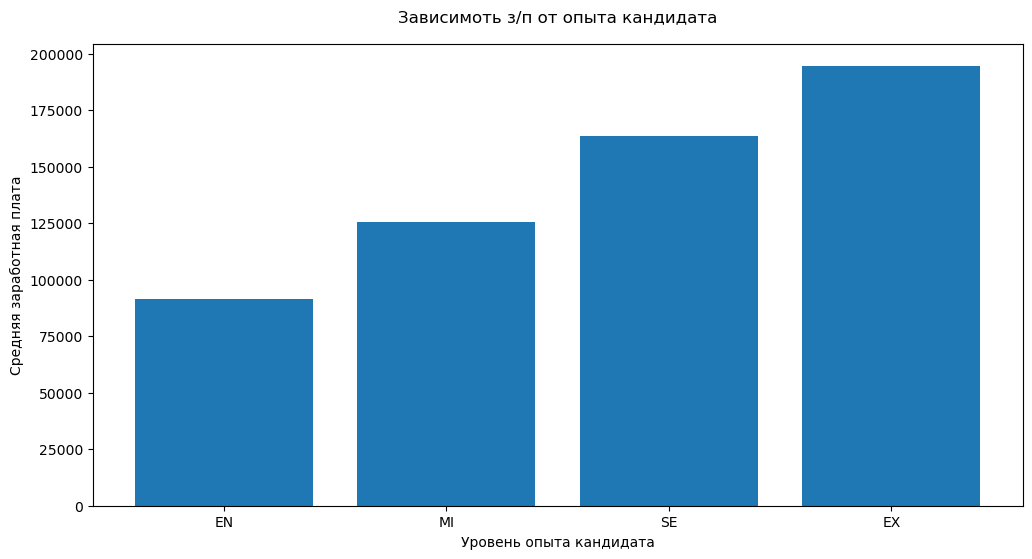

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(experience_level_x, experience_level_y)
plt.xlabel('Уровень опыта кандидата')
plt.ylabel('Средняя заработная плата')
plt.title('Зависимоть з/п от опыта кандидата', pad = 16)
plt.show()

Основываясь на данных можно сделать ожидаемый вывод о том, что самый низкий средний уровень у позиций с оптытом - начальный, самый высокий у позиций с опытом сеньор и experienced level. 

#### Построим графики динамиики заработной платы, в зависимости от опыты респондентов по годам

In [10]:
year_list = sorted(data['work_year'].unique().tolist())
ex_level_list = data['experience_level'].unique().tolist()
ex_level_list = ['EN', 'MI', 'SE', 'EX']

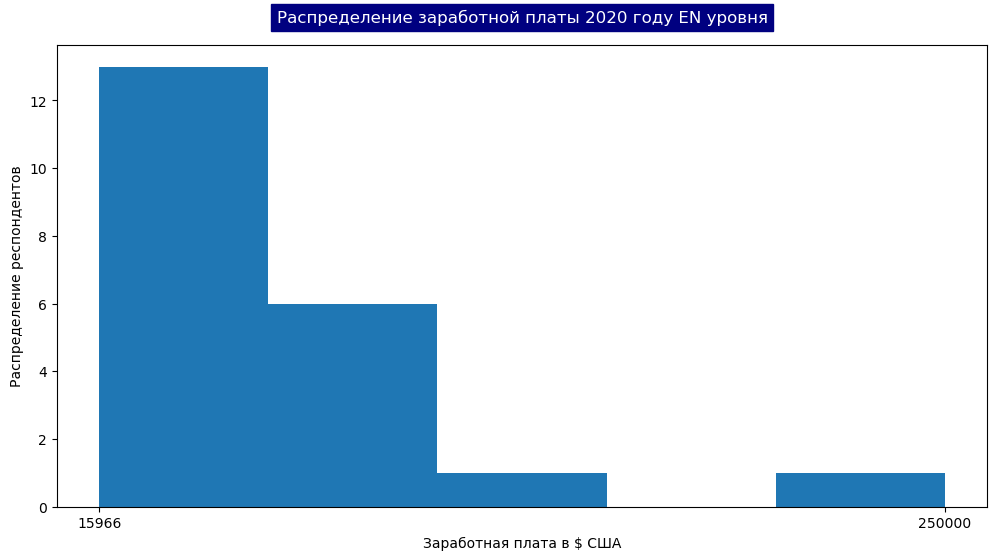

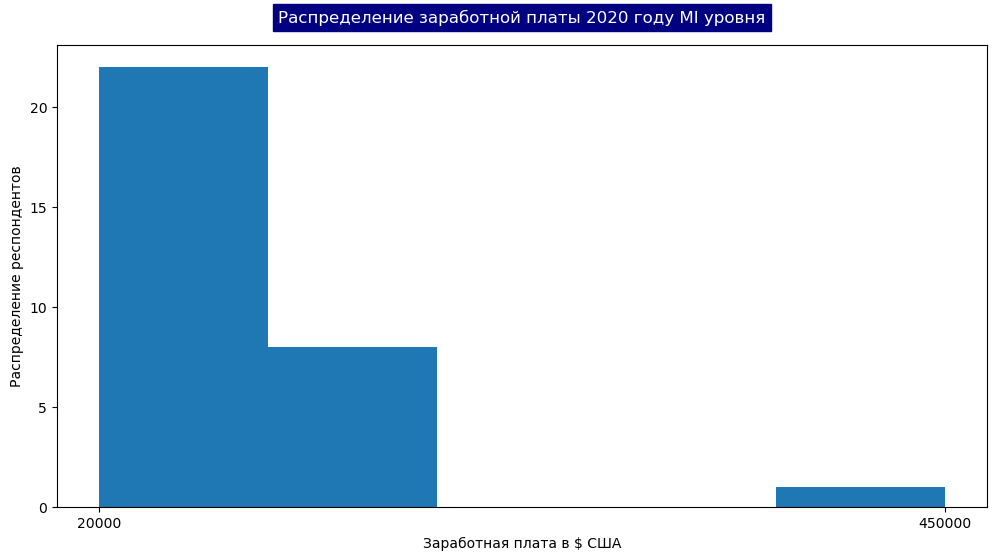

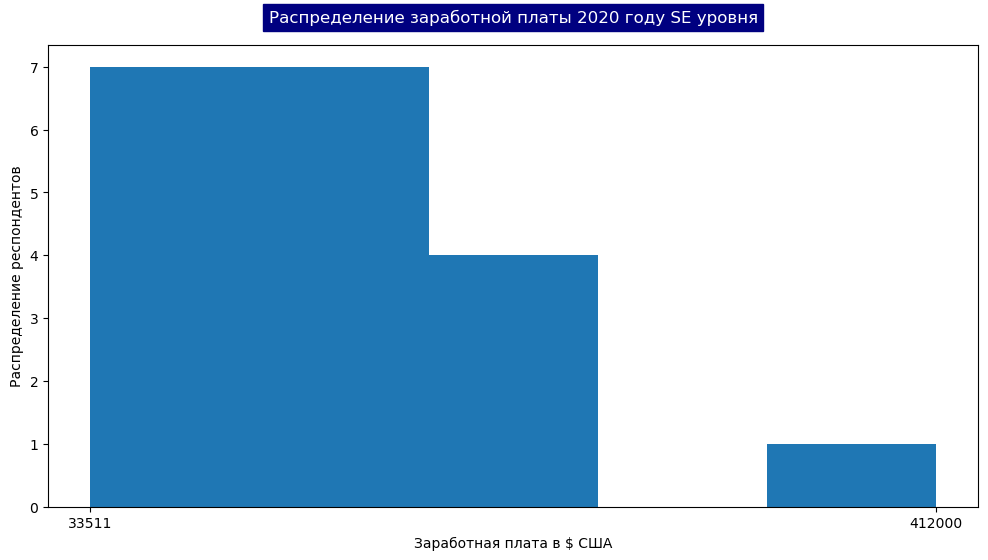

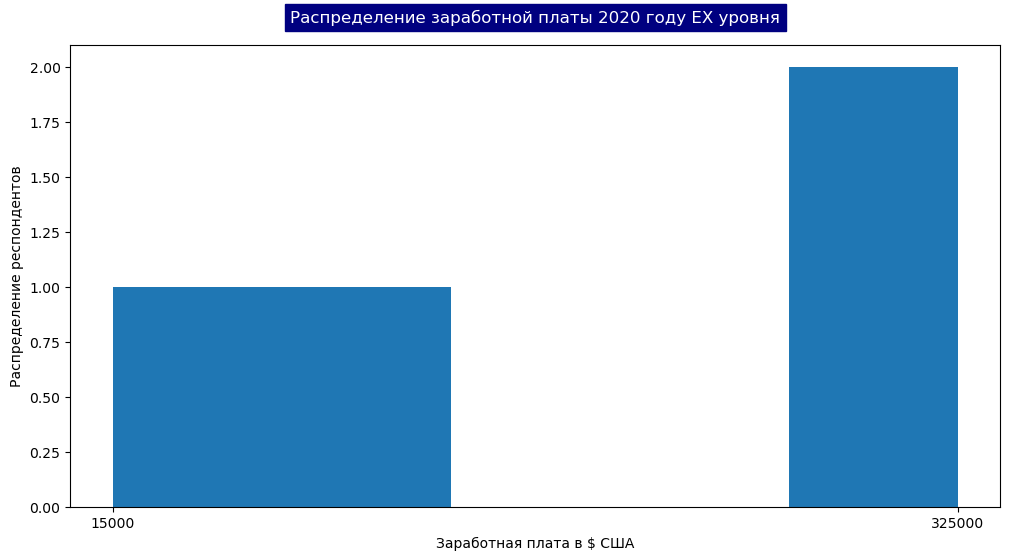

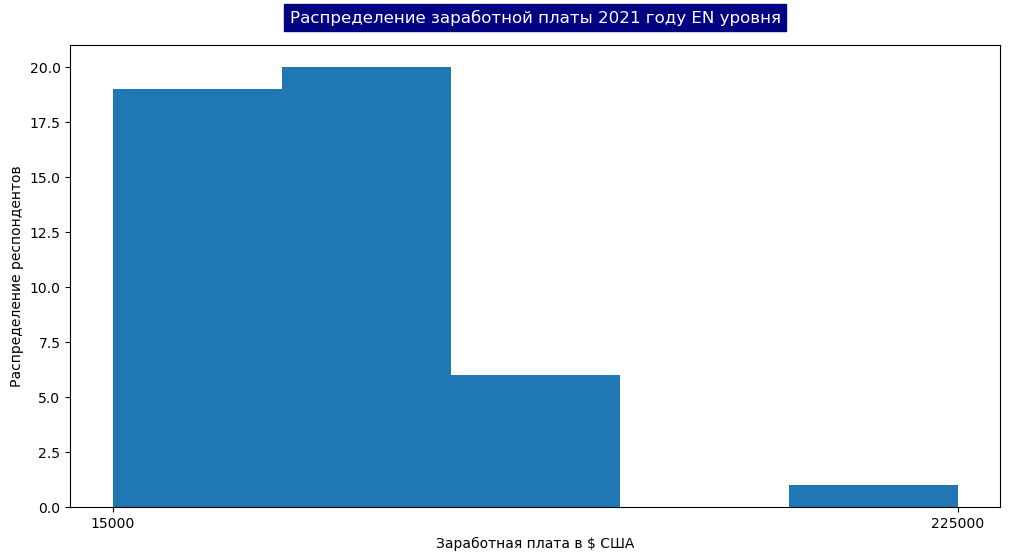

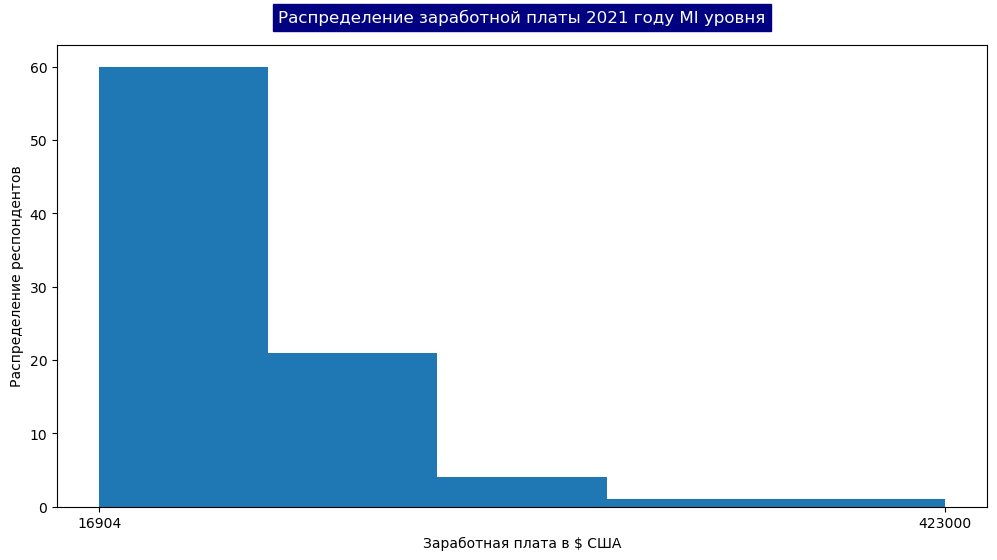

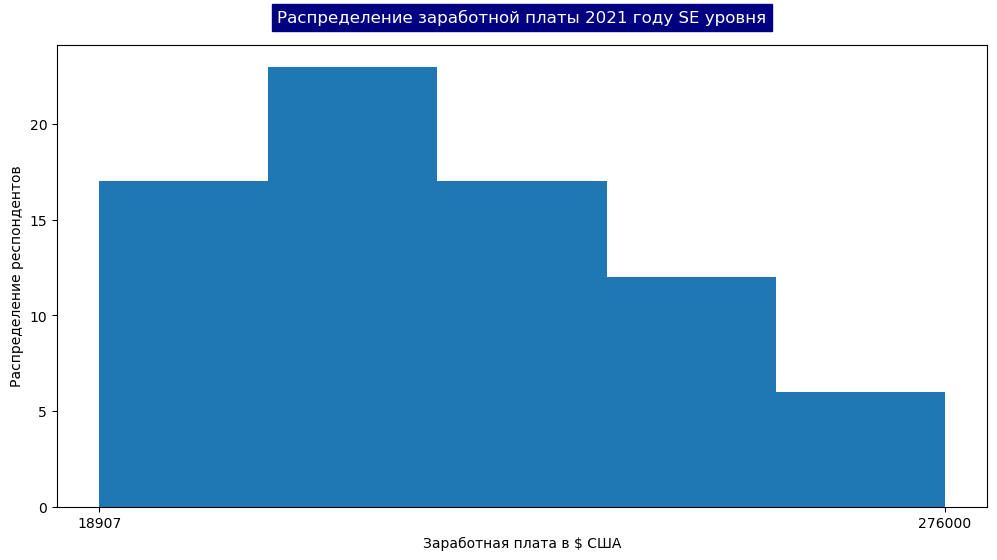

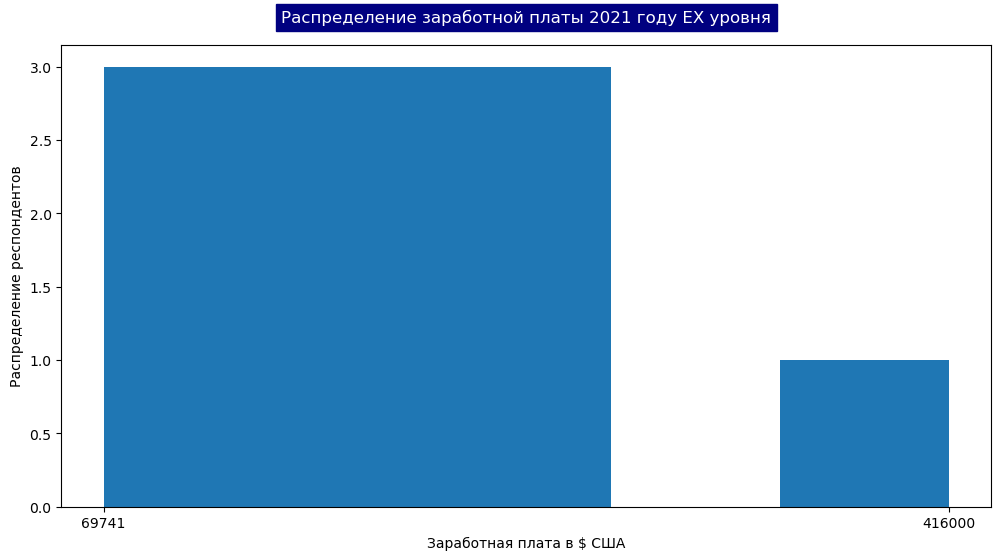

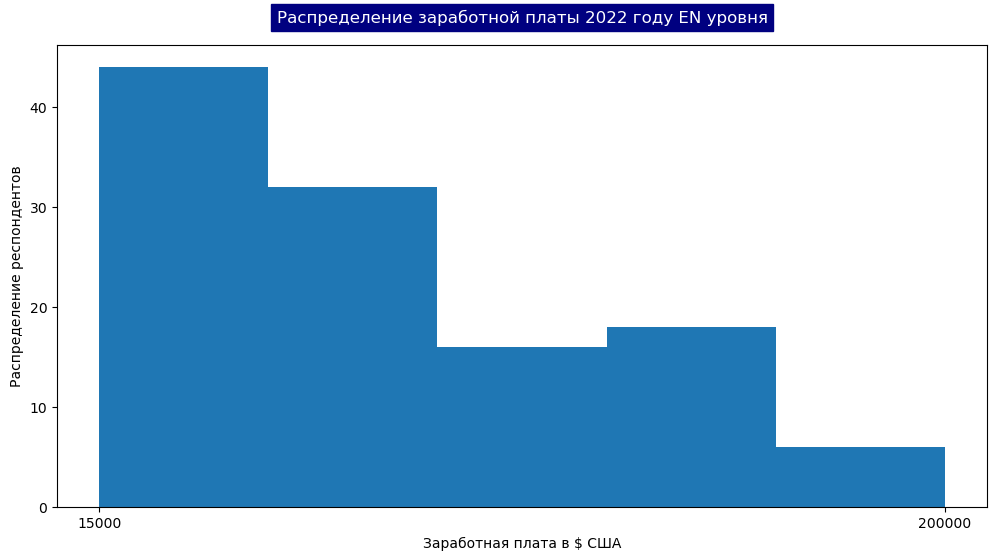

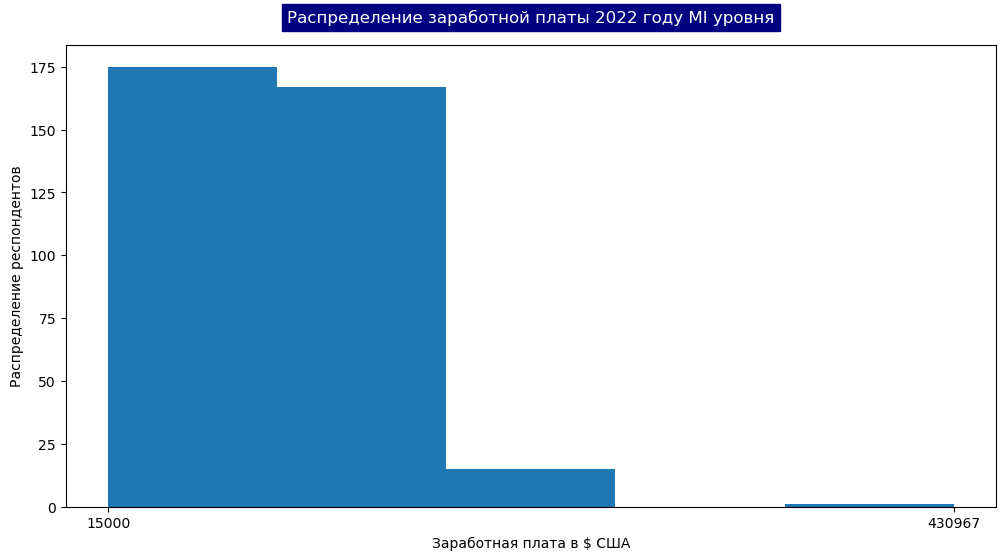

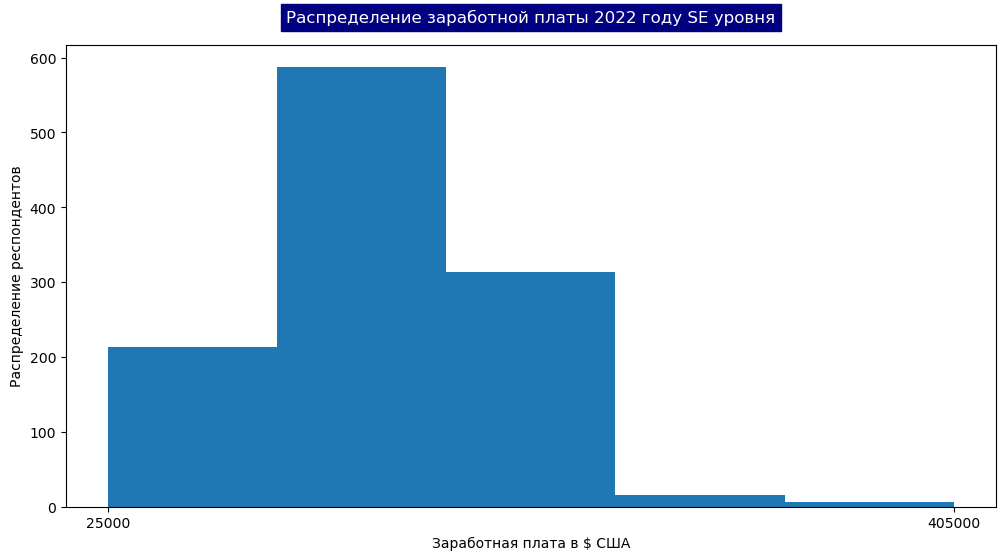

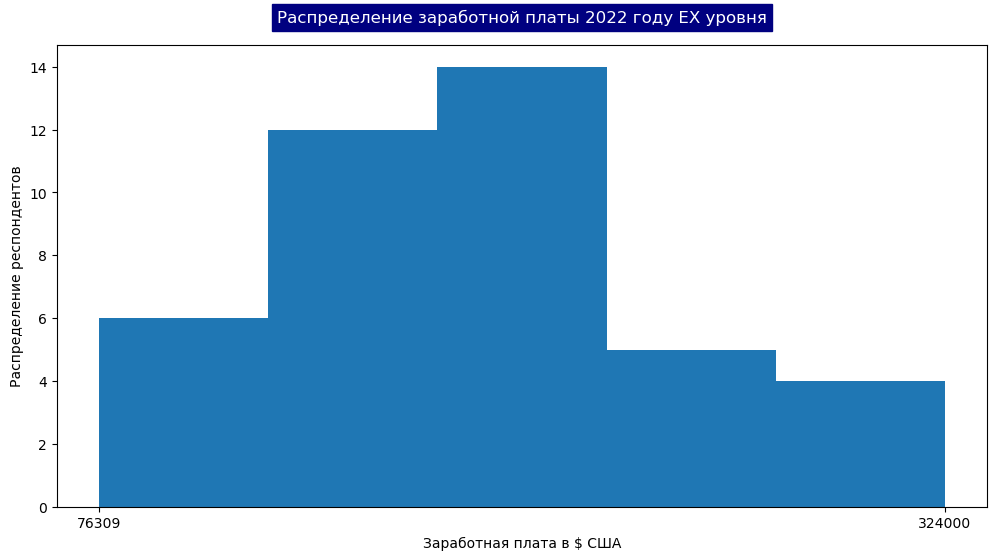

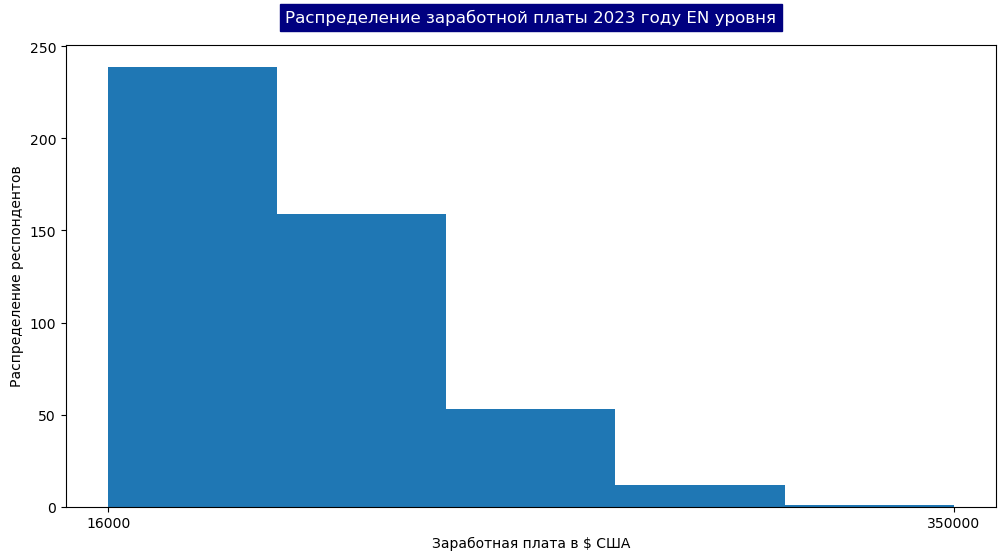

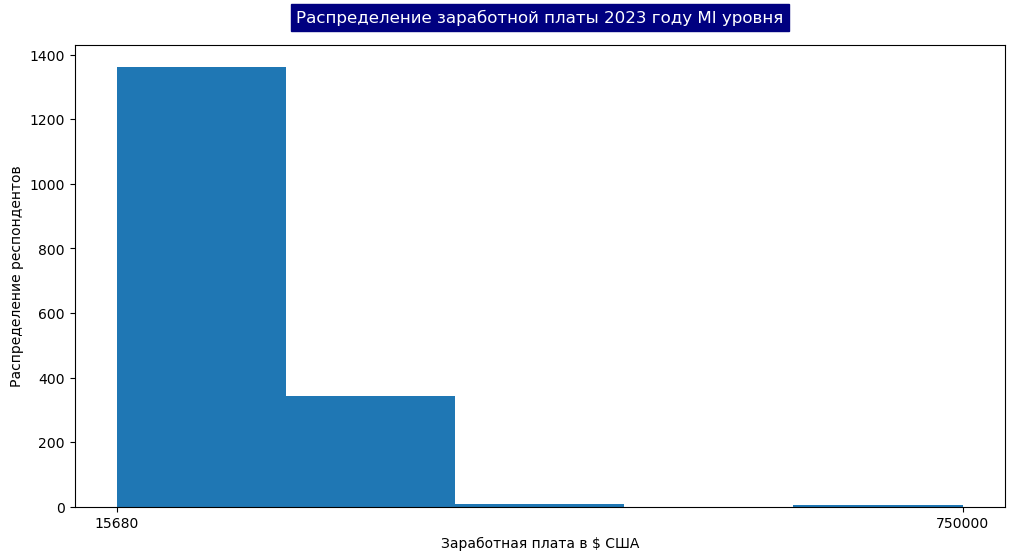

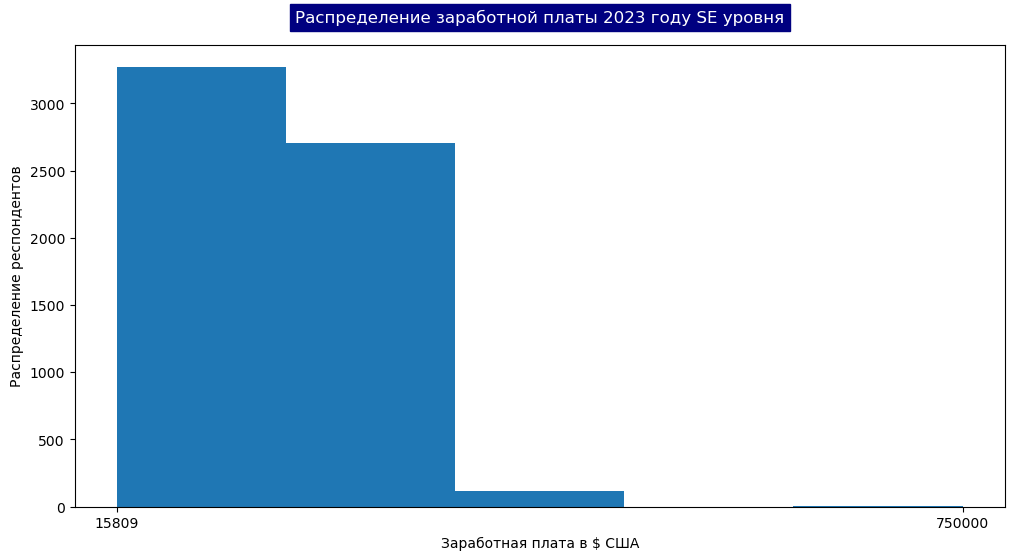

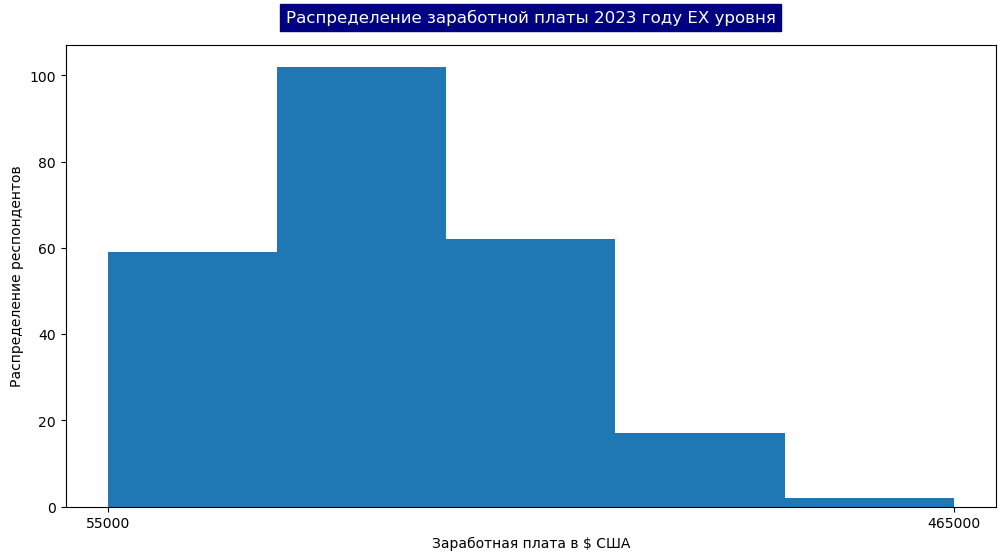

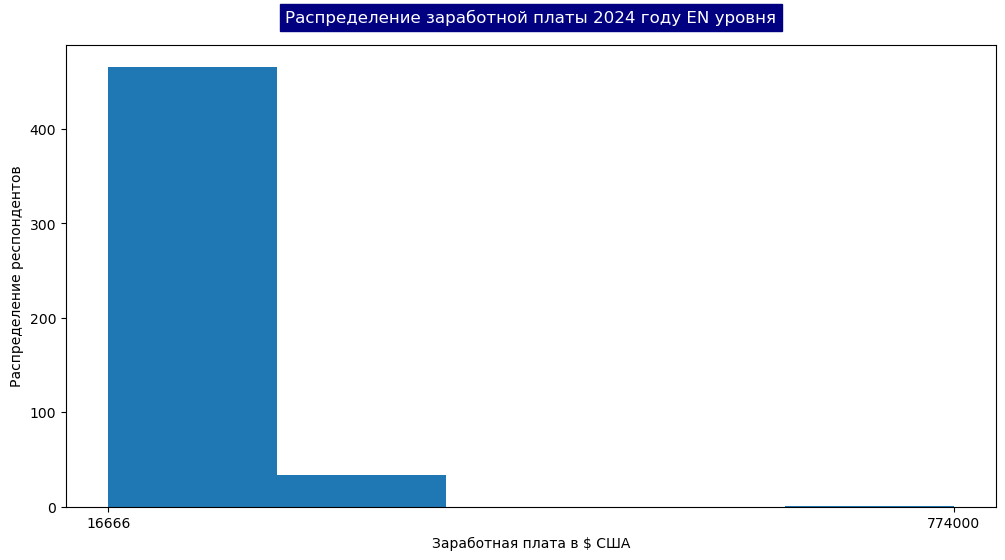

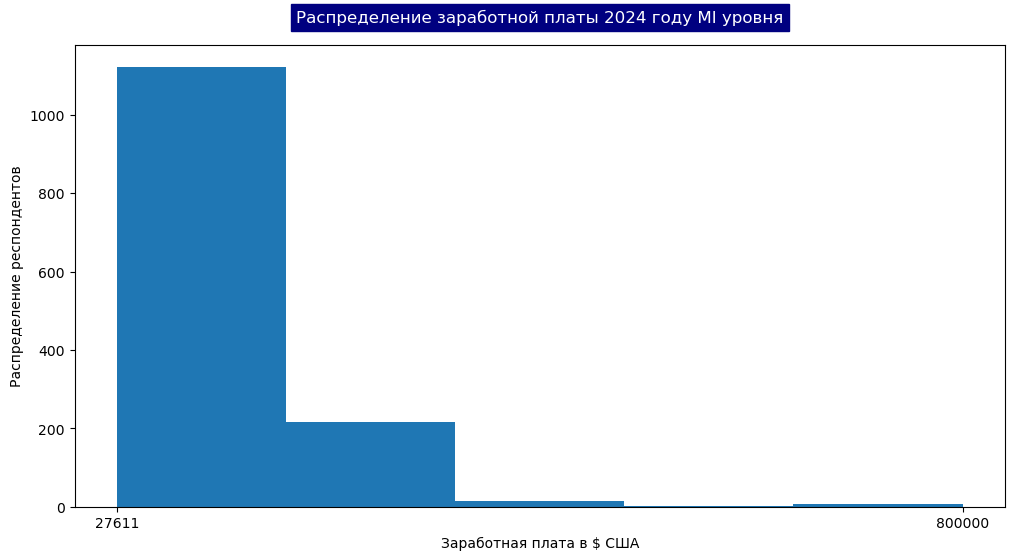

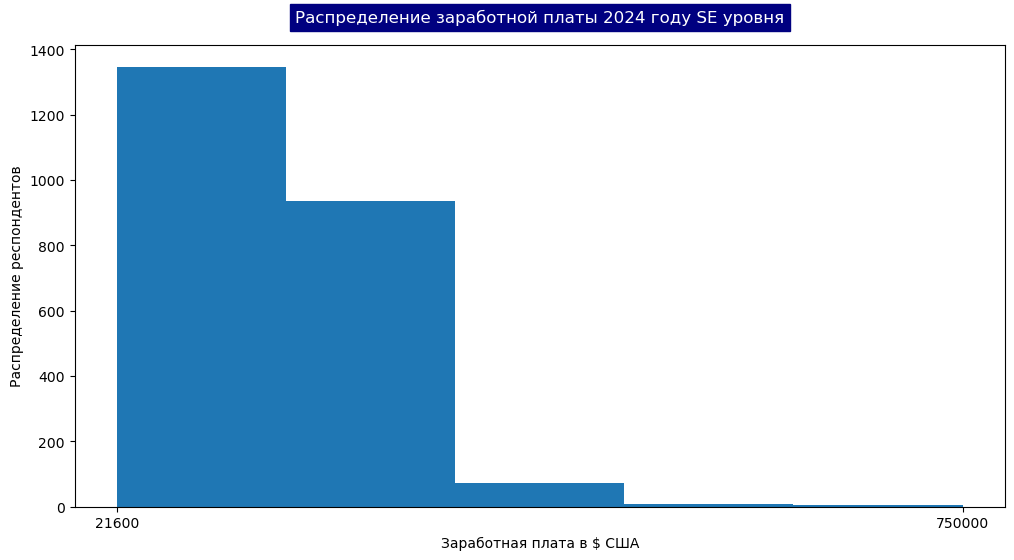

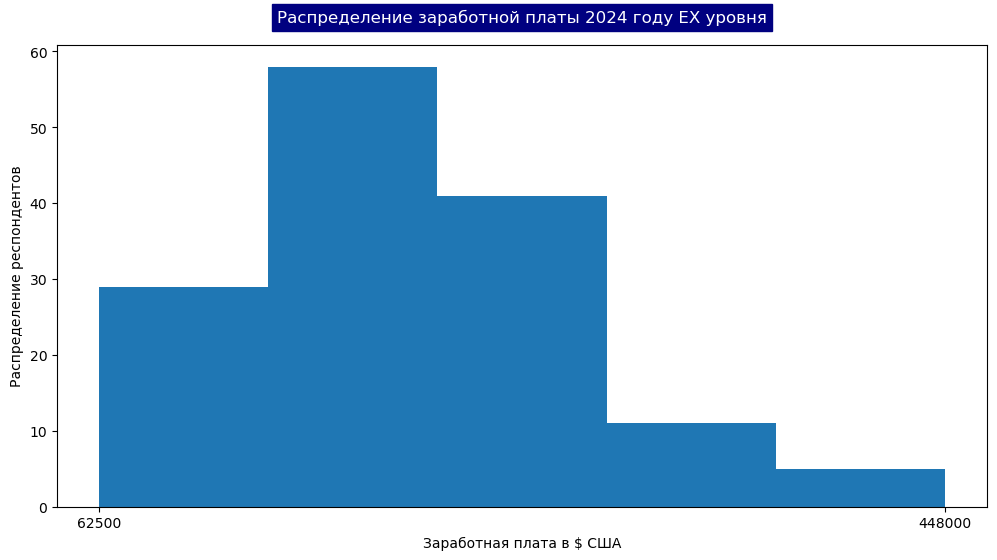

In [11]:
for year in year_list:
    for ex_level in ex_level_list:
        filtered_data = data[(data['work_year'] == year) & (data['experience_level'] == ex_level)]['salary_in_usd']
        fig, ax = plt.subplots(figsize=(12,6))
        _, bins, _ = ax.hist(filtered_data, bins = 5)
  
        ax.set_title('Распределение заработной платы ' + str(year) + ' году ' + ex_level + ' уровня', pad = 16, color = 'white', backgroundcolor = 'navy')
        ax.set_xlabel('Заработная плата в $ США')
        ax.set_ylabel('Распределение респондентов')
        ax.set_xticks([bins[0], bins[-1]])

На основании представленных графиков можно заключить следующее, в целом минимальная заработная плата имеет тендецию к росту. Так же как и максимальная. При этом максимальные заработные платы получают еденицы. Для уровня опты junior и midle - характерно распределение в сторону минимальной оплаты труда. 
* для уровня EN - junior:
    - в 2020 году минимальная оплата была на уровне 15 966 в год, максимальная доходила до 250 000 в год.
    - в 2021 году минимальная оплата была на уровне 15 000 в год, максимальная доходила до 225 000 в год.
    - в 2022 году минимальная оплата была на уровне 15 000 в год, максимальная доходила до 200 000 вгод.
    - в 2023 году минимальная оплата была на уровне 16 000 в год, максимальная доходила до 350 000 в год.
    - в 2024 году минимальная оплата была на уровне 16 666 в год, максимальная доходила до 774 000 в год.
* для уровня MI - midle:
  - в 2020 году минимальная оплата была на уровне 20 000 в год, максимальная доходила до 450 000 в год.
  - в 2021 году минимальная оплата была на уровне 16 904 в год, максимальная доходила до 423 000 в год.
  - в 2022 году минимальная оплата была на уровне 15 000 в год, максимальная доходила до 430 967 в год.
  - в 2023 году минимальная оплата была на уровне 15 680 в год, максимальная доходила до 750 000 в год.
  - в 2024 году минимальная оплата была на уровне 27 611 в год, максимальная доходила до 800 000 в год.
* для уровня SE - senior:
  - в 2020 году минимальная оплата была на уровне 33 511 в год, максимальная доходила до 412 000 в год.
  - в 2021 году минимальная оплата была на уровне 18 907 в год, максимальная доходила до 276 000 в год.
  - в 2022 году минимальная оплата была на уровне 25 000 в год, максимальная доходила до 405 000 в год.
  - в 2023 году минимальная оплата была на уровне 15 809 в год, максимальная доходила до 750 000 в год.
  - в 2024 году минимальная оплата была на уровне 21 600 в год, максимальная доходила до 750 000 в год.
* для уровня EX - experinced:
  - в 2020 году минимальная оплата была на уровне 15 000 в год, максимальная доходила до 325 000 в год.
  - в 2021 году минимальная оплата была на уровне 67 741 в год, максимальная доходила до 416 000 в год.
  - в 2022 году минимальная оплата была на уровне 76 309 в год, максимальная доходила до 324 000 в год.
  - в 2023 году минимальная оплата была на уровне 55 000 в год, максимальная доходила до 465 000 в год.
  - в 2024 году минимальная оплата была на уровне 62 500 в год, максимальная доходила до 448 000 в год.
    

#### 4. Зависимость заработной платы от области работы респондента

Для данного анализа было бы удобно использовать новый, более мелкий срез дата - сэта. Выберем 2 параметра, и сгруппируем по профессии. 

In [12]:
title = (data.loc[:, ['job_title','salary_in_usd']]).groupby('job_title').agg('mean').sort_values(['salary_in_usd'], ascending = False)
title.head(5)

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Head of Machine Learning,299758.428571
Managing Director Data Science,280000.000000
AWS Data Architect,258000.000000


Выведем топ - 10 направлений, с самой высокой среденй заработной платой

In [13]:
top_10 = title.head(10)
top_10

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Head of Machine Learning,299758.428571
Managing Director Data Science,280000.000000
AWS Data Architect,258000.000000
AI Architect,255142.357143
Cloud Data Architect,250000.000000
Director of Data Science,218775.333333
Head of Data,210013.714286


Выведем 10 направлений с самой низкой средней заработной платой

In [14]:
bottom_10 = title.tail(10)
bottom_10

,salary_in_usd
job_title,
Sales Data Analyst,60000.000000
Data Quality Manager,59059.000000
Encounter Data Management Professional,56650.000000
Machine Learning Specialist,55000.000000
Quantitative Research Analyst,51000.000000
Admin & Data Analyst,50740.666667
Insight Analyst,46459.916667
Compliance Data Analyst,45000.000000
CRM Data Analyst,40000.000000


#### 5. Рассчитать среднюю заработную плату в каждой из областей, выявить область с наиболее привлекательными условиями оплаты

В дата - сэт у нас представлено 153 узко - специализированных направления. Направления можно разбить на 8 больших групп представленных ниже.

In [15]:
title_job_unique = list(set(data['job_title'].tolist()))


In [16]:
data_engineering_architecture = ['Data Engineer', 'Lead Data Engineer', 'Data Integration Specialist', 'Data Architect',
                                 'Data Infrastructure Engineer', 'Principal Data Architect', 'Data Modeler', 'Data Strategist',
                                 'Data Manager', 'Data Specialist', 'Data Product Owner', 'Data Product Manager', 'Data Strategy Manager',
                                 'Data Operations Engineer', 'Data Operations Specialist', 'Data Pipeline Engineer',
                                 'Data Integration Developer', 'Data Developer', 'Data Integration Engineer', 'Data Quality Engineer',
                                 'Cloud Data Architect', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Azure Data Engineer']


In [17]:
bi_analytics = ['BI Data Analyst', 'Business Intelligence', 'BI Analyst', 'Analytics Engineer', 'Data Analytics Manager',
                'Data Analytics Lead', 'Analytics Engineering Manager', 'Business Intelligence Manager', 
                'Business Intelligence Specialist', 'Business Intelligence Engineer', 'Business Intelligence Analyst',
                'Business Intelligence Developer', 'Business Intelligence Lead', 'Business Intelligence Data Analyst',
                'Data Analytics Specialist', 'Data Analytics Consultant', 'Data Analytics Associate', 'Data Analytics Engineer']

In [18]:
specialized_roles = ['NLP Engineer', 'Computer Vision Engineer', 'Robotics Software Engineer', 'Computational Biologist',
                     'Autonomous Vehicle Technician', 'Decision Scientist', 'Cloud Data Engineer', 
                     'Robotics Engineer', 'Prompt Engineer', 'Financial Data Analyst', 'Deep Learning Engineer',
                     'Deep Learning Researcher', 'Computer Vision Software Engineer']


In [19]:
other_roles = ['Data Lead', 'Data Operations Manager', 'Data Management Specialist', 'Data Visualization Specialist',
               'Data Quality Engineer', 'Data Quality Analyst', 'Data Visualization Engineer', 'Data Visualization Analyst',
               'Data Operations Specialist', 'Data Operations Analyst', 'Data Reporting Analyst', 'Data Modeller',
               'Data DevOps Engineer', 'Data Operations Manager', 'Data Management Analyst', 'Data Management Consultant',
               'Manager Data Management']



In [20]:
ai_and_ml_related_roles = ['AI Programmer', 'AI Research Engineer', 'AI Scientist', 'AI Architect', 'AI Engineer',
                           'AI Developer', 'AI Product Manager', 'AI Research Scientist', 'AI Software Engineer']


In [21]:
data_analysis_engineering = ['Data Analyst', 'Lead Data Analyst', 'Business Data Analyst', 'Product Data Analyst',
                             'Data Quality Analyst', 'Financial Data Analyst', 'Marketing Data Analyst', 'Data Analyst Lead',
                             'Staff Data Analyst']

In [22]:
data_science_analytics = ['Data Scientist', 'Lead Data Scientist', 'Applied Data Scientist', 'Data Science Manager', 'Head of Data Science',
                          'Director of Data Science', 'Managing Director Data Science', 'Data Science Tech Lead', 'Data Science Lead',
                          'Data Science Director', 'Data Science Practitioner', 'Data Science Engineer', 'Staff Data Scientist', 'Data Science Analyst']

In [23]:
machine_Learning = ['ML Engineer', 'Lead Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Scientist', 'Machine Learning Software Engineer',
                    'Machine Learning Operations Engineer', 'Machine Learning Modeler', 'Machine Learning Manager', 'Machine Learning Developer', 'Machine Learning Researcher',
                    'Machine Learning Research Engineer', 'Staff Machine Learning Engineer', 'Principal Machine Learning Engineer', 'ML Ops Engineer']

In [24]:
# функция вычисления средней зп по группе
def aver(titile_list, data_f, uniqe_list):
    some_list = []
    for i_title in titile_list:
        if i_title in uniqe_list:
            mean_salary = data_f[data_f['job_title'] == i_title]['salary_in_usd'].mean()
            some_list.append(mean_salary)
        else:
            pass
    return some_list

In [25]:
total_inf_dict = dict()

Средняя заработная плата для группы data_engineering_architecture:

In [26]:
mid_data_engineering_architecture = aver(data_engineering_architecture, data, title_job_unique)
av_data_engineering_architecture = round(statistics.mean(mid_data_engineering_architecture), 2)
print('Средняя з/п группы {0} - {1}'.format('data_engineering_architecture', av_data_engineering_architecture))
total_inf_dict['data_engineering_architecture'] = av_data_engineering_architecture

Средняя з/п группы data_engineering_architecture - 130117.4


Средняя заработная плата для группы bi_analytics:

In [27]:
mid_bi_analytics = aver(bi_analytics, data, title_job_unique)
av_mid_bi_analytics= round(statistics.mean(mid_bi_analytics), 2)
print('Средняя з/п группы {0} - {1}'.format('bi_analytics', av_mid_bi_analytics))
total_inf_dict['bi_analytics'] = av_mid_bi_analytics

Средняя з/п группы bi_analytics - 135947.7


Средняя заработная плата для группы specialized_roles:

In [28]:
mid_specialized_roles = aver(specialized_roles, data, title_job_unique)
av_mid_specialized_roles = round(statistics.mean(mid_specialized_roles), 2)
print('Средняя з/п группы {0} - {1}'.format('specialized_roles', av_mid_specialized_roles))
total_inf_dict['specialized_roles'] = av_mid_specialized_roles

Средняя з/п группы specialized_roles - 144721.4


Средняя заработная плата для группы other_roles:

In [29]:
mid_other_roles = aver(other_roles, data, title_job_unique)
av_mid_other_roles = round(statistics.mean(mid_other_roles), 2)
print('Средняя з/п группы {0} - {1}'.format('other_roles', av_mid_other_roles))
total_inf_dict['other_roles'] = av_mid_other_roles

Средняя з/п группы other_roles - 105199.05


Средняя заработная плата для группы ai_and_ml_related_roles:

In [30]:
mid_ai_and_ml_related_roles = aver(ai_and_ml_related_roles, data, title_job_unique)
av_mid_ai_and_ml_related_roles = round(statistics.mean(mid_ai_and_ml_related_roles), 2)
print('Средняя з/п группы {0} - {1}'.format('ai_and_ml_related_roles', av_mid_ai_and_ml_related_roles))
total_inf_dict['ai_and_ml_related_roles'] = av_mid_ai_and_ml_related_roles

Средняя з/п группы ai_and_ml_related_roles - 139594.01


Средняя заработная плата для группы data_analysis_engineering:

In [31]:
mid_data_analysis_engineering = aver(data_analysis_engineering, data, title_job_unique)
av_mid_data_analysis_engineering = round(statistics.mean(mid_data_analysis_engineering), 2)
print('Средняя з/п группы {0} - {1}'.format('data_analysis_engineering', av_mid_data_analysis_engineering))
total_inf_dict['data_analysis_engineering'] = av_mid_data_analysis_engineering

Средняя з/п группы data_analysis_engineering - 87526.07


Средняя заработная плата для группы data_science_analytics:

In [32]:
mid_data_science_analytics = aver(data_science_analytics, data, title_job_unique)
av_mid_data_science_analytics = round(statistics.mean(mid_data_science_analytics), 2)
print('Средняя з/п группы {0} - {1}'.format('data_science_analytics', av_mid_data_science_analytics))
total_inf_dict['data_science_analytics'] = av_mid_data_science_analytics

Средняя з/п группы data_science_analytics - 175482.6


Средняя заработная плата для группы machine_Learning:

In [33]:
mid_machine_Learning = aver(machine_Learning, data, title_job_unique)
av_mid_machine_Learning = round(statistics.mean(mid_machine_Learning), 2)
print('Средняя з/п группы {0} - {1}'.format('machine_Learning', av_mid_machine_Learning))
total_inf_dict['machine_Learning'] = av_mid_machine_Learning

Средняя з/п группы machine_Learning - 147901.08


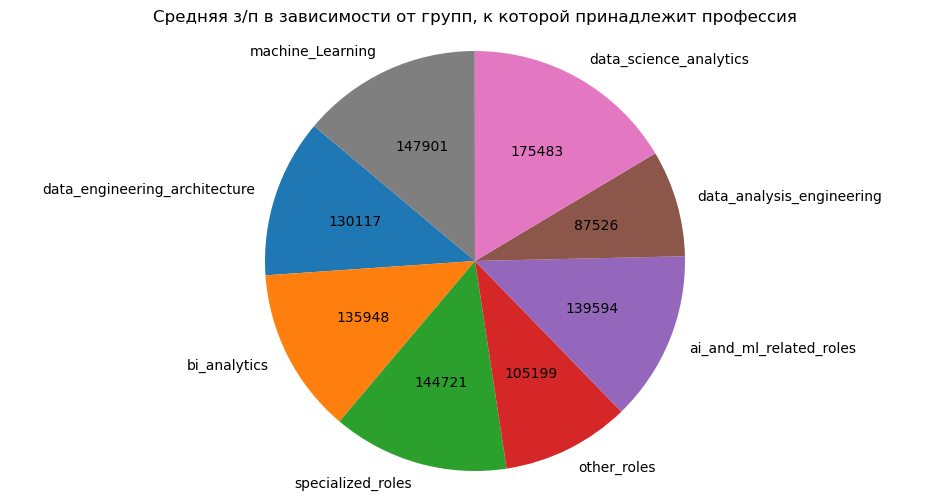

In [34]:
labels = list(total_inf_dict.keys())
values = list(total_inf_dict.values())
plt.figure(figsize=(12, 6))
plt.pie(values, labels=labels, autopct=lambda p: f'{p * sum(values) / 100:.0f}', startangle=140)
plt.axis('equal') 
plt.title('Средняя з/п в зависимости от групп, к которой принадлежит профессия')
plt.show()

Самая высокая средняя заработная плата зафиксирована в группе data_science_analytics и составляет в среднем 175 483 $ в год. Самая низкая средняя заработная плата зафиксирована в группе data_analysis_engineering - 87526 в год. 

#### 6. Расчиать долю самых популярных профессий

In [35]:
share_job_titles = data.groupby('job_title')['job_title'].count().sort_values(ascending = False).to_dict()

In [36]:
share_job_title_df = pd.DataFrame(share_job_titles.items(), columns=['Key', 'Value'])
share_job_title_df = share_job_title_df.head(5)
share_job_title_df

,Key,Value
0,Data Engineer,3162
1,Data Scientist,3015
2,Data Analyst,2189
3,Machine Learning Engineer,1542
4,Research Scientist,475


Вычислим количество остальных, менее популярных професссий

In [37]:
others = len(data['job_title']) - share_job_title_df['Value'].sum()

In [38]:
list_to_lables = list(share_job_title_df['Key'])
list_to_lables.append('others')
list_to_sizes = list(share_job_title_df['Value'])
list_to_sizes.append(others)

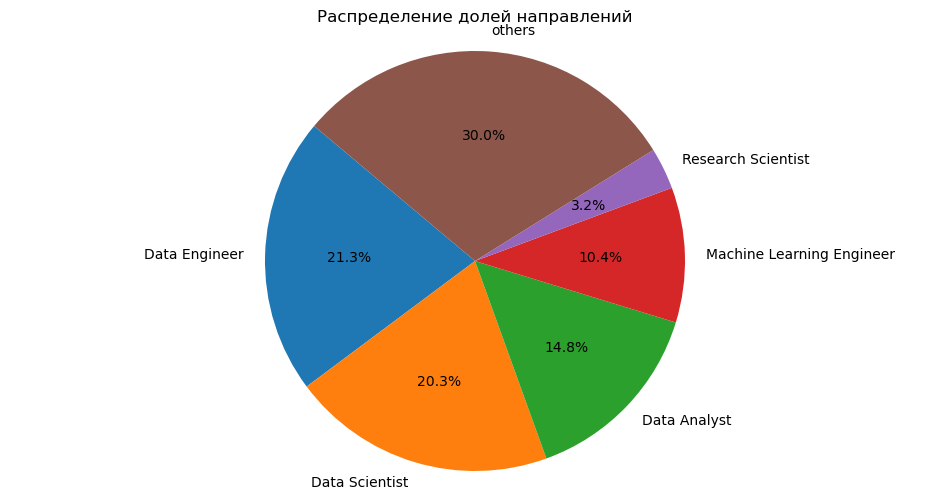

In [39]:
plt.figure(figsize=(12, 6))
plt.pie(list_to_sizes, labels=list_to_lables, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение долей направлений')
plt.show()

Самым популярным направлением области Data является направленеи Data Engineer, затем следует Data Scientist, Аналитики, Машинное обучение. На оставшиеся 149 направлений, в представленной выборке, приходится 33,2 %. 

В связи с этим, было бы интеренсно рассмотреть именно эти 4 напраления в разрезе максимальной, минимальной заработных плат. Их зависимоти от размера компании, локации респондента, и его опыта. 

#### 7. Проанализировать манимальную и максимальную оплату труда 4 самых популярных профессий дата-сэта

In [40]:
top_4 = data[data['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer'])]

In [41]:
top_4_unique = top_4['job_title'].unique().tolist()
top_4_unique

['Data Scientist',
 'Machine Learning Engineer',
 'Data Engineer',
 'Data Analyst']

In [42]:
min_salary = top_4.groupby('job_title')['salary_in_usd'].min()
max_salary = top_4.groupby('job_title')['salary_in_usd'].max()

##### Минимальная и максимальные заработые платы

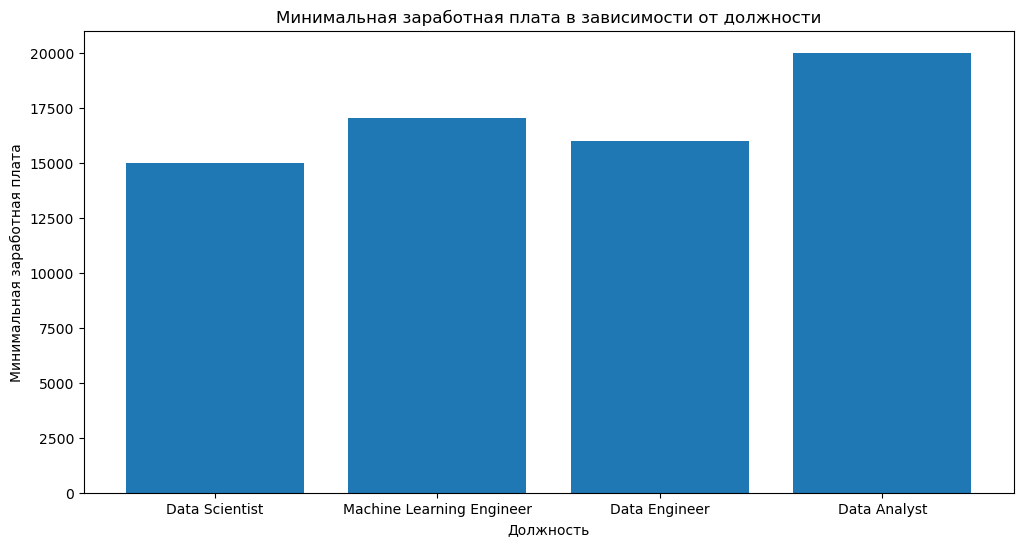

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(top_4_unique, min_salary)
plt.xlabel('Должность')
plt.ylabel('Минимальная заработная плата')
plt.title('Минимальная заработная плата в зависимости от должности')
plt.show()

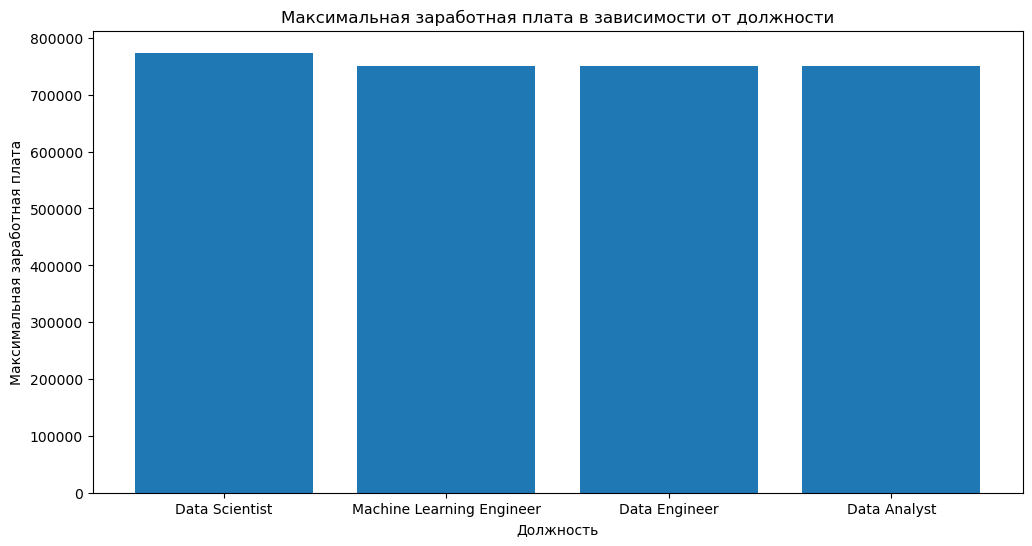

In [44]:
plt.figure(figsize=(12, 6))
plt.bar(top_4_unique, max_salary)
plt.xlabel('Должность')
plt.ylabel('Максимальная заработная плата')
plt.title('Максимальная заработная плата в зависимости от должности')
plt.show()

В части минимальных значений, самая низкая средняя заработная плата приходится на профессию - Data Scientist, самая высокая на профессию - Data Analyst.
В части максимальных значений разница практически не заметна, при этом Data Scientist - выходит на лидирующую позицию. 

#### 8. Проанализировать среднюю заработную плату профессии Data Scientist в зависимости от страны резиденства работника

Для анализа возьмем информацию по одной из самых популярных профессий - Data Scientist.

In [45]:
data_scientist = data[data['job_title'] == 'Data Scientist']
data_scientist.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
15,2022,MI,FT,Data Scientist,4200000,INR,53416,IN,100,ID,L
17,2021,SE,FT,Data Scientist,4000000,INR,54094,IN,100,IN,L


In [46]:
data_s_res = data_scientist.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending = False)
data_s_res = data_s_res.head(10).to_dict()

Заменим ключи в словаре на названия соответсвующих стран

In [47]:
countries = ['Switzerland', 'New Zealand', 'United States', 'Canada','Egypt',
             'Singapore', 'Australia', 'Dominican Republic', 'Ireland', 'Algeria']
data_s_res = dict(zip(countries, data_s_res.values()))

In [48]:
residance = list(data_s_res.keys())
salary = list(data_s_res.values())

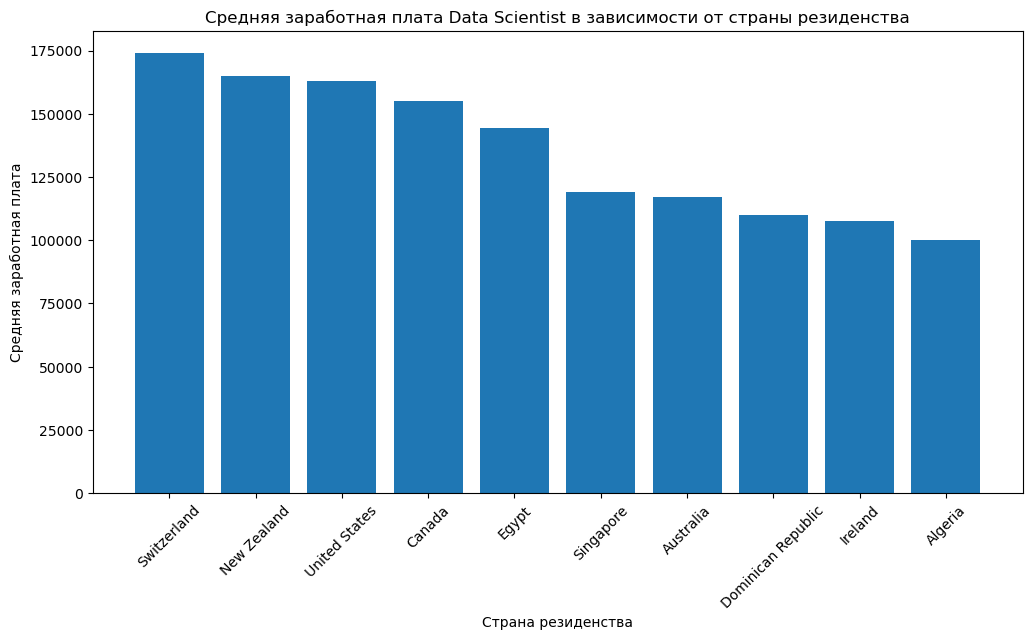

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(residance, salary)
plt.xlabel('Страна резиденства')
plt.ylabel('Средняя заработная плата')
plt.title('Средняя заработная плата Data Scientist в зависимости от страны резиденства')
plt.xticks(rotation=45)
plt.show()

Самую высокую заработную плату по профессии Data Scientist получают резиденты Швейцарии. В топ 10 так же попали Египет, Доминиканская республика, Алжир. 

#### 9. Определить в какой стране больше всего резидентов профессии Data Scientist

In [50]:
data_s_share = data_scientist.groupby('employee_residence')['employee_residence'].count().sort_values(ascending = False)
data_s_share_total = data_s_share.sum()
data_s_share_2 = data_s_share.head(3)

In [51]:
rest_data_s = data_s_share_total - data_s_share_2.sum()

In [52]:
data_s_share_2 = data_s_share_2.to_dict()

In [53]:
data_s_share_2['rest'] = rest_data_s

In [54]:
data_s_share_2

{'US': 2613, 'GB': 108, 'CA': 100, 'rest': 194}

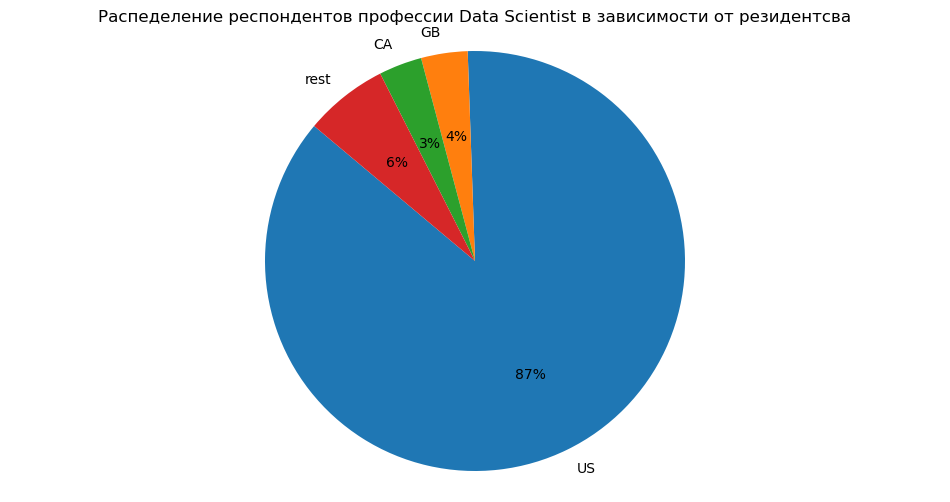

In [55]:
labels_ds = list(data_s_share_2.keys())
values_ds = list(data_s_share_2.values())
plt.figure(figsize=(12, 6))
plt.pie(values_ds, labels=labels_ds, autopct='%1.0f%%', startangle=140)
plt.axis('equal') 
plt.title('Распеделение респондентов профессии Data Scientist в зависимости от резидентсва')
plt.show()

87 % респондентов проживают в США, 4 % в Великобритании, 3 % в Канаде, на остальные страны приходится 6 % 

#### 10. Расчитать уровень средней зарабной платы в зависимости от размера компании

In [56]:
data_company_en = data[data['experience_level'] == 'EN'].groupby(['company_size'])['salary_in_usd'].mean().sort_values()
data_company_en

company_size
S    66858.882353
L    74700.460317
M    95159.622039
Name: salary_in_usd, dtype: float64

Уровень зарабоной платы для уровня junior зависит от размера компании. При этом компании среднего размера готовы платить больше чем крупные компании. 

##### Для уровня midle

In [57]:
data_company_mi = data[data['experience_level'] == 'MI'].groupby(['company_size', ])['salary_in_usd'].mean().sort_values()
data_company_mi

company_size
S     73291.238806
L    121904.919192
M    126805.314832
Name: salary_in_usd, dtype: float64

Уровень зарабоной платы для уровня midle: самую большую среднюю заработную плату предлагают компании среднего размера. При этмо можно заметить, что маленькие компании для уровня midle предлагают уровень зароботной платы ниже, чем крупные и средние компании для уровня junior.

##### Для уровня senior

In [58]:
data_company_se = data[data['experience_level'] == 'SE'].groupby(['company_size'])['salary_in_usd'].mean().sort_values()
data_company_se

company_size
S    109155.309091
L    162919.906890
M    164076.564697
Name: salary_in_usd, dtype: float64

Для уровня senior картина такая же как и для midle. Наиболее привлекательные условия предлагают средние компании. Маленькие компании так же предлагают уровень заработной платы ниже уровня midle крупных и средних компаний. 

#### 11. Оценить уровень заработной платы в зависимости от размера и локации компании

In [59]:
data_company_= data[data['job_title'] == 'Data Scientist'].groupby(['company_size', 'company_location'])['salary_in_usd'].mean().sort_values(ascending = False)

In [60]:
data_company_ = data_company_.head(5)
data_company_

company_size  company_location
L             CH                  173970.000000
M             NZ                  164951.500000
              CA                  164731.955056
              US                  163278.983386
L             US                  155227.259259
Name: salary_in_usd, dtype: float64

Наиболее привлекательные страны Швейцария, Новая Заландия, Канада и США. Размерм компании большая или средняя

## Выводы

На оснве проведенного анализа можно сделать следующие основные выводы: 
* Заработная плата показывает тенденцию к росту, несмотя на незначительне колебания ближе к концу отрезков исследуeмых периодов. На основе чего можно сделать вывод о том, что профессии в разрезрезе исследования и работы с данными являются востребованными.
* Наиболее высоко - оплачиваемой является работа в офисе.
* Ожидаемо, самый низкий уровень оплаты труда у уровня junior. При этом в дата-сэт представлено 153 профессии. И, в разрезе одной из наиболее популярных профессий -  Data Scientist, уровень оплаты зависит от размера компании - наибольший уровень заработной платы предлагают компании среднего размера.
*  Наболее высоко - оплачиваемыми профессиями являются Analytics Engineering Manager, Data Science Tech Lead, Head of Machine Learning
*  Наименее оплачиваемыми профессиями явлюятся: Principal Data Architect, CRM Data Analyst, Compliance Data Analyst
*  Наиболее привлекательными с точки зрения заработной платы являются группы: data_science_analytics, machine_Learning, либо спциалисты в узконаправленных областях знаний, например, NLP Engineer
*  При это самыми популярными профессиями стали: Data Engineer, Data Scientist, Data Analyst
*  Минимальная заработная плата наиболее привлекательная в профессии Data Analyst, тогда как максимальная в профессии Data Scientist
*  Наибольшую среднюю заработную плату получют резиденты таких стран как: Швейцария, Новая Зеландия, США, Канада.
*  Большая часть резидентов профессии Data Scientist приходится на США

Глобальный вывод: развиваться в области Data Scientist и Data Analyst, в компании среднего размера, находящейся в Новой Зеландии,  США или Канаде. Поскольку в Швейцарии уровень жизни дороже. 